# 문장(시계열수치)입력 다중클래스분류 모델
- 문장 혹은 시계열수치로 타입을 분류하는 문제를 풀 수 있음

### 데이터셋 준비
- 로이터에서 제공하는 뉴스와이어 데이터셋
- 총 11,228개의 샘플로 구성
- 라벨은 46개 주제로 지정되어 0에서 45의 값을 가지고 있음
- 데이터셋은 이미 정수로 인코딩되어 있으며, 정수값은 단어의 빈도수를 나타냄 
- 모든 단어를 고려할 수 없으므로 빈도수가 높은 단어를 위주로 데이터셋을 생성
- 15,000번째로 많이 사용하는 단어까지만 데이터셋으로 만들고 싶다면, num_words 인자에 15000이라고 지정하면 됨

In [1]:
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:
x_val = x_train[7000:]      # 총 8,982개중 1,982개는 검증용
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

In [3]:
max_features = 15000
text_max_words = 120

In [4]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

## 1. 다층퍼셉트론 신경망 모델

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

In [8]:
# 모델 구성하기
model1 = Sequential()
model1.add(Embedding(max_features, 128, input_length=text_max_words))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(46, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 128)          1920000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3932416   
_________________________________________________________________
dense_4 (Dense)              (None, 46)                11822     
Total params: 5,864,238
Trainable params: 5,864,238
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 학습과정 설정하기
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 학습시키기
hist1 = model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

W0910 17:25:04.718917 15440 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0910 17:25:04.782405 15440 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 6s 794us/step - loss: 1.9199 - acc: 0.5146 - val_loss: 1.4663 - val_acc: 0.6504
Epoch 2/10
7000/7000 [==============================] - 3s 477us/step - loss: 0.8490 - acc: 0.8047 - val_loss: 1.2951 - val_acc: 0.7069
Epoch 3/10
7000/7000 [==============================] - 3s 477us/step - loss: 0.2809 - acc: 0.9507 - val_loss: 1.3858 - val_acc: 0.6847
Epoch 4/10
7000/7000 [==============================] - 3s 478us/step - loss: 0.1789 - acc: 0.9621 - val_loss: 1.4051 - val_acc: 0.6852
Epoch 5/10
7000/7000 [==============================] - 3s 476us/step - loss: 0.1509 - acc: 0.9620 - val_loss: 1.3813 - val_acc: 0.6983
Epoch 6/10
7000/7000 [==============================] - 3s 475us/step - loss: 0.1291 - acc: 0.9637 - val_loss: 1.3811 - val_acc: 0.6932
Epoch 7/10
7000/7000 [==============================] - 3s 476us/step - loss: 0.1162 - acc: 0.9629 - val_loss: 1.4875 - val_acc: 0.6847


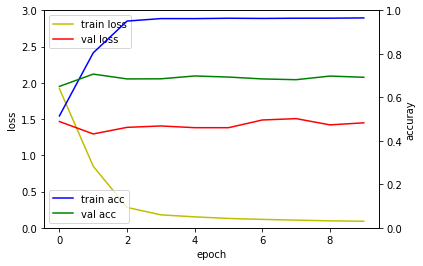

In [12]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist1.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
# 모델 평가하기
loss_and_metrics = model1.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2246/2246 [==============================] - 0s 53us/step
## evaluation loss and_metrics ##
[1.4785858351315968, 0.6838824577291205]


## 2. 순환 신경망 모델

In [14]:
from keras.layers import LSTM
# 모델 구성하기
model2 = Sequential()
model2.add(Embedding(max_features, 128))
model2.add(LSTM(128))
model2.add(Dense(46, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1920000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 46)                5934      
Total params: 2,057,518
Trainable params: 2,057,518
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델 학습과정 설정하기
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# 모델 학습시키기
hist2 = model2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 22s 3ms/step - loss: 2.5173 - acc: 0.3744 - val_loss: 2.0530 - val_acc: 0.4960
Epoch 2/10
7000/7000 [==============================] - 21s 3ms/step - loss: 2.0137 - acc: 0.5107 - val_loss: 1.9578 - val_acc: 0.5131
Epoch 3/10
7000/7000 [==============================] - 28s 4ms/step - loss: 1.8242 - acc: 0.5454 - val_loss: 1.7730 - val_acc: 0.5590
Epoch 4/10
7000/7000 [==============================] - 33s 5ms/step - loss: 1.6599 - acc: 0.5953 - val_loss: 1.6442 - val_acc: 0.5969
Epoch 5/10
7000/7000 [==============================] - 43s 6ms/step - loss: 1.4178 - acc: 0.6466 - val_loss: 1.4921 - val_acc: 0.6418
Epoch 6/10
7000/7000 [==============================] - 46s 7ms/step - loss: 1.2380 - acc: 0.6920 - val_loss: 1.4926 - val_acc: 0.6327
Epoch 7/10
7000/7000 [==============================] - 46s 7ms/step - loss: 1.1087 - acc: 0.7159 - val_loss: 1.4903 - val_acc: 0.6332
Epoch 8

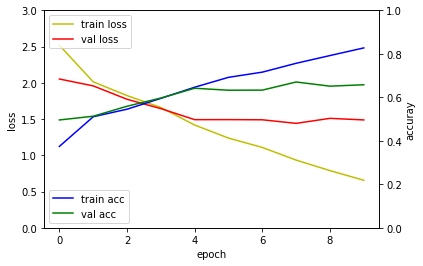

In [17]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
# 모델 평가하기
loss_and_metrics = model2.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2246/2246 [==============================] - 1s 630us/step
## evaluation loss and_metrics ##
[1.574536947724231, 0.6460373998219056]


## 3. 컨볼루션 신경망 모델

In [20]:
from keras.layers import Dropout, Conv1D, GlobalMaxPooling1D
# 모델 구성하기
model3 = Sequential()
model3.add(Embedding(max_features, 128, input_length=text_max_words))
model3.add(Dropout(0.2))
model3.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(46, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 128)          1920000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 118, 256)          98560     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 46)               

In [21]:
# 모델 학습과정 설정하기
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# 모델 학습시키기
hist3 = model3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 5s 644us/step - loss: 2.2703 - acc: 0.4453 - val_loss: 1.7521 - val_acc: 0.5172
Epoch 2/10
7000/7000 [==============================] - 3s 404us/step - loss: 1.5607 - acc: 0.6237 - val_loss: 1.3369 - val_acc: 0.6852
Epoch 3/10
7000/7000 [==============================] - 3s 405us/step - loss: 1.2168 - acc: 0.7094 - val_loss: 1.1801 - val_acc: 0.7255
Epoch 4/10
7000/7000 [==============================] - 3s 406us/step - loss: 0.9689 - acc: 0.7664 - val_loss: 1.0866 - val_acc: 0.7442
Epoch 5/10
7000/7000 [==============================] - 3s 409us/step - loss: 0.7504 - acc: 0.8137 - val_loss: 1.0328 - val_acc: 0.7558
Epoch 6/10
7000/7000 [==============================] - 3s 418us/step - loss: 0.5685 - acc: 0.8569 - val_loss: 1.0141 - val_acc: 0.7735
Epoch 7/10
7000/7000 [==============================] - 3s 434us/step - loss: 0.4267 - acc: 0.8916 - val_loss: 1.0695 - val_acc: 0.7725


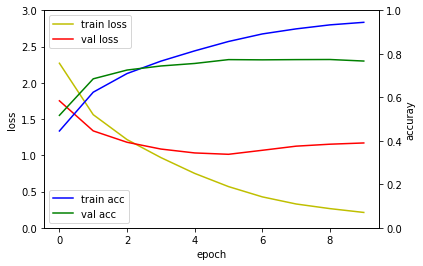

In [23]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [24]:
# 모델 평가하기
loss_and_metrics = model3.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2246/2246 [==============================] - 0s 82us/step
## evaluation loss and_metrics ##
[1.2969207973853882, 0.7462154942650085]


## 4. 순환 컨볼루션 신경망 모델

In [26]:
from keras.layers import MaxPooling1D
# 모델 구성하기
model4 = Sequential()
model4.add(Embedding(max_features, 128, input_length=text_max_words))
model4.add(Dropout(0.2))
model4.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
model4.add(Dense(46, activation='softmax'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 128)          1920000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 118, 256)          98560     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 29, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_11 (Dense)             (None, 46)                5934      
Total params: 2,221,614
Trainable params: 2,221,614
Non-trainable params: 0
____________________________________________

In [27]:
# 모델 학습과정 설정하기
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# 모델 학습시키기
hist4 = model4.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 11s 2ms/step - loss: 2.1936 - acc: 0.4444 - val_loss: 1.7324 - val_acc: 0.5358
Epoch 2/10
7000/7000 [==============================] - 10s 1ms/step - loss: 1.6220 - acc: 0.5844 - val_loss: 1.5251 - val_acc: 0.6231
Epoch 3/10
7000/7000 [==============================] - 11s 2ms/step - loss: 1.2802 - acc: 0.6720 - val_loss: 1.3150 - val_acc: 0.6801
Epoch 4/10
7000/7000 [==============================] - 18s 3ms/step - loss: 0.9975 - acc: 0.7487 - val_loss: 1.3026 - val_acc: 0.6816
Epoch 5/10
7000/7000 [==============================] - 27s 4ms/step - loss: 0.8011 - acc: 0.7954 - val_loss: 1.2824 - val_acc: 0.6842
Epoch 6/10
7000/7000 [==============================] - 17s 2ms/step - loss: 0.6569 - acc: 0.8326 - val_loss: 1.3187 - val_acc: 0.7013
Epoch 7/10
7000/7000 [==============================] - 17s 2ms/step - loss: 0.5406 - acc: 0.8579 - val_loss: 1.2526 - val_acc: 0.7119
Epoch 8

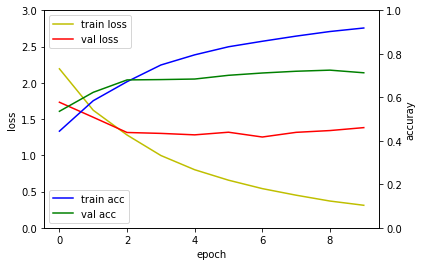

In [29]:
# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist4.history['loss'], 'y', label='train loss')
loss_ax.plot(hist4.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist4.history['acc'], 'b', label='train acc')
acc_ax.plot(hist4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [30]:
# 모델 평가하기
loss_and_metrics = model4.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2246/2246 [==============================] - 1s 548us/step
## evaluation loss and_metrics ##
[1.4301423574279486, 0.7016918967052538]
